<a href="https://colab.research.google.com/github/bieri2/ATMS597-Project3-GroupE/blob/master/project_3_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import xarray as xr
! pip install netcdf4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
def is_djf(month):
    return (month == 12) | (month <= 2)

In [0]:
pcp = xr.open_dataset('/content/drive/My Drive/pcp_all.nc')

In [0]:
pcp_j = pcp.sel(latitude=-6.21,longitude=106.85,method='nearest')['precip']
pcp_j = pcp_j.sel(time=is_djf(pcp_j['time.month']))
pcp_j = pcp_j.where(pcp_j != -99999.0)
pcp_j = pcp_j.where(pcp_j < 100.)

In [0]:
pcp_quant = pcp_j.quantile(0.95)

In [0]:
pcp_above_dates = pcp_j[pcp_j >= pcp_quant].time.values

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


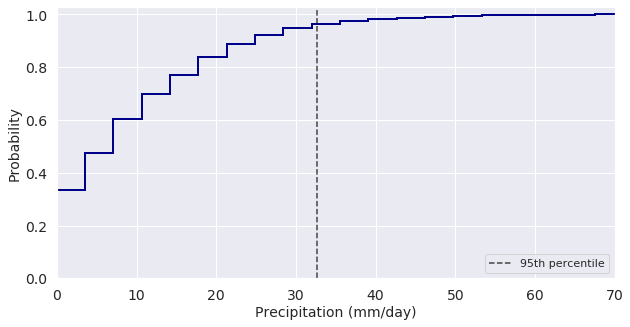

In [97]:
sns.set()
fig, ax = plt.subplots(figsize=(10, 5))

# plot the cumulative histogram
n, bins, patches = ax.hist(pcp_j, 20, linewidth=2.0, color='darkblue', density=True, histtype='step', cumulative=True)
plt.vlines(pcp_quant,0,1.1, linestyles='dashed', label='95th percentile', alpha=0.8)
plt.legend(loc='lower right')
ax.set_xlim(0,70)
ax.set_ylim(0,1.03)
ax.set_xlabel('Precipitation (mm/day)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)